# METADATA

### Data Source: https://s3.amazonaws.com/talent-assets.datacamp.com/boat_data.csv

### Variables Used For This Analysis:
1. **Price:** Character, boat price listed in different currencies (e.g. EUR, Â£, CHF etc.) on the website.
2. **Boat Type:** Character, type of the boat.
3. **Manufacturer:** Character, manufacturer of the boat.
4. **Type:** Character, condition of the boat and engine type(e.g. Diesel, Unleaded, etc.)
5. **Year Built:** Numeric, year of the boat built.
6. **Length:** Numeric, length in meter of the boat.
7. **Width:** Numeric, width in meter of the boat.
8. **Material:** Character, material of the boat (e.g. GRP, PVC, etc.)
9. **Location:** Character, location of the boat listed.
10. **Number of views last 7 days:** Numeric, number of the views of the list last 7 days.

# BUSINESS CASE

Nearly New Nautical is a fictional website that allows users to advertise their used boats for sale. The marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed to help sellers to get more views of their boat, as well as stay on top of market trends. The Head of Marketing has laid out an ambitious goal of increasing the number of readers by 75% this year. 

They would like you to tell them:
- *Is it the most expensive boats that get the most views?*
- *Are there common features among the most viewed boats?*

In [138]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [139]:
df = pd.read_csv("C:/Users/user/Downloads/boat_data.csv")

In [140]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


# DATA CLEANING AND WRANGLING

In [142]:
#New column for price currency
df['Currency'] = df.Price.str.rstrip('0,1,2,3,4,5,6,7,8,9')

In [143]:
df['Currency'] = df.Currency.str.strip()

In [144]:
#Unique currencies in dataset
df.Currency.unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [145]:
df['Price'] = df.Price.str.lstrip('CHF, EUR , DKK, Â£,  ')

In [146]:
#Converting Price to Integer
df['Price'] = df.Price.astype('int64')

In [147]:
#Converting different currencies into USD
df['Price'] = np.round(np.where(df['Currency']=='CHF', df['Price']/0.99, df['Price']), 2)
df['Price'] = np.round(np.where(df['Currency']=='EUR', df['Price']/1.04, df['Price']), 2)
df['Price'] = np.round(np.where(df['Currency']=='DKK', df['Price']/7.75, df['Price']), 2)
df['Price'] = np.round(np.where(df['Currency']=='Â£', df['Price']/0.93, df['Price']), 2)

In [148]:
df.drop('Currency', axis=1, inplace=True)

In [149]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3370.71,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,3355.77,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,3808.08,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,3341.94,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,3268.27,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [150]:
df.describe()

,Price,Year Built,Length,Width,Number of views last 7 days
count,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000
mean,2.905740e+05,1893.192860,11.570017,3.520124,149.160801
std,9.300954e+05,460.201582,6.002820,1.220534,151.819752
min,3.173080e+03,0.000000,1.040000,0.010000,13.000000
25%,4.134615e+04,1996.000000,7.470000,2.540000,70.000000
50%,9.024101e+04,2007.000000,10.280000,3.330000,108.000000
75%,2.388159e+05,2017.000000,13.930000,4.250000,172.000000
max,2.980769e+07,2021.000000,100.000000,25.160000,3263.000000


In [151]:
#Checking for missing values
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [152]:
#New DataFrame
new_df = df.drop(['Manufacturer', 'Material'], axis=1)

In [153]:
new_df.head()

,Price,Boat Type,Type,Year Built,Length,Width,Location,Number of views last 7 days
0,3370.71,Motor Yacht,new boat from stock,2017,4.00,1.90,Switzerland,226
1,3355.77,Center console boat,new boat from stock,2020,4.00,1.50,Germany,75
2,3808.08,Sport Boat,new boat from stock,0,3.69,1.42,Switzerland,124
3,3341.94,Sport Boat,new boat from stock,2020,3.00,1.00,Denmark,64
4,3268.27,Fishing Boat,new boat from stock,2019,3.55,1.46,Germany,58


In [154]:
new_df.shape

(9888, 8)

In [155]:
new_df['Year Built'].replace(0, np.nan, inplace=True)

In [156]:
new_df['Width'].replace(0.01, 0.1, inplace=True)

In [157]:
new_df.dropna(inplace=True)

In [158]:
new_df['Year Built'] = new_df['Year Built'].astype('int64')

In [159]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9241 entries, 0 to 9887
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9241 non-null   float64
 1   Boat Type                    9241 non-null   object 
 2   Type                         9241 non-null   object 
 3   Year Built                   9241 non-null   int64  
 4   Length                       9241 non-null   float64
 5   Width                        9241 non-null   float64
 6   Location                     9241 non-null   object 
 7   Number of views last 7 days  9241 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 649.8+ KB


In [160]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,9241.0,289737.777340,899528.463159,3173.08,43173.08,91397.85,239903.85,29807692.31
Year Built,9241.0,2004.931176,16.387410,1885.00,1999.00,2008.00,2018.00,2021.00
Length,9241.0,11.717052,5.997217,1.04,7.56,10.50,14.00,100.00
Width,9241.0,3.552561,1.211891,0.10,2.55,3.39,4.26,25.16
Number of views last 7 days,9241.0,150.446813,155.106784,13.00,70.00,108.00,172.00,3263.00


In [161]:
#Creating new category
new_df['price_category'] = pd.cut(new_df['Price'], bins=[0, new_df['Price'].median(), new_df['Price'].quantile(0.75), np.Infinity], labels=['Cheap', 'Moderate', 'Expensive'], right=False )

In [162]:
#Dataframee for boats having at least 200 views
most_viewed = new_df[new_df['Number of views last 7 days'] >= 172]

In [163]:
most_viewed.shape

(2329, 9)

In [164]:
most_viewed.sort_values(['Number of views last 7 days', 'Price'], ascending=False)

,Price,Boat Type,Type,Year Built,Length,Width,Location,Number of views last 7 days,price_category
9580,15050.51,Motor Yacht,"Used boat,Unleaded",1992,7.70,2.46,Switzerland,3263,Cheap
8723,35353.54,Hardtop,"Used boat,Diesel",1979,11.12,3.88,Switzerland,2432,Cheap
6211,127171.72,"Bowrider,Motor Yacht,Sport Boat","Used boat,Diesel",2002,12.35,3.48,Switzerland,2261,Moderate
3700,912500.00,Hardtop,"Used boat,Diesel",2009,20.30,5.20,Neustadt,2154,Expensive
308,20101.01,Sport Boat,"Used boat,Unleaded",1993,6.14,2.34,Switzerland,2026,Cheap
...,...,...,...,...,...,...,...,...,...
9180,22019.23,Sport Boat,"Used boat,Unleaded",1994,6.57,2.43,Austria,172,Cheap
9243,20192.31,Flybridge,"Used boat,Diesel",1993,8.40,2.86,France,172,Cheap
260,16250.00,Trawler,Used boat,1995,5.70,2.80,Rovinij,172,Cheap
200,13653.85,Sport Boat,Used boat,2019,6.35,2.45,Italy,172,Cheap


In [165]:
#Removing Outliers
df_no_outliers = new_df[new_df['Price'].between(new_df['Price'].quantile(0.15), new_df['Price'].quantile(0.85))]

In [166]:
new_df.head()

,Price,Boat Type,Type,Year Built,Length,Width,Location,Number of views last 7 days,price_category
0,3370.71,Motor Yacht,new boat from stock,2017,4.00,1.90,Switzerland,226,Cheap
1,3355.77,Center console boat,new boat from stock,2020,4.00,1.50,Germany,75,Cheap
3,3341.94,Sport Boat,new boat from stock,2020,3.00,1.00,Denmark,64,Cheap
4,3268.27,Fishing Boat,new boat from stock,2019,3.55,1.46,Germany,58,Cheap
6,3636.36,Catamaran,"Used boat,Unleaded",1999,6.20,2.38,Switzerland,474,Cheap


# EXPLORATORY DATA ANALYSIS

In [167]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set_style('darkgrid')
sns.set_context('notebook')

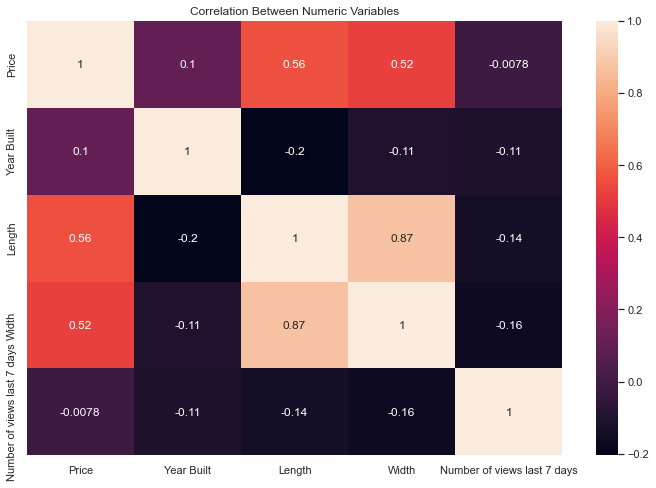

In [168]:
sns.heatmap(new_df.corr(), annot=True)
plt.title("Correlation Between Numeric Variables")
plt.show()

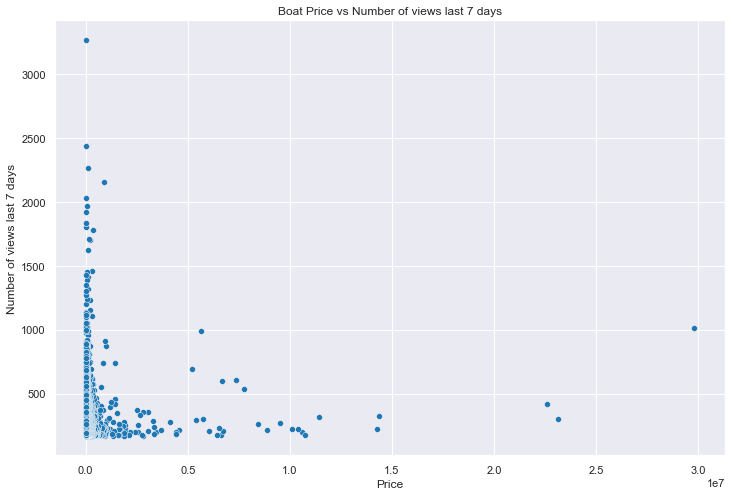

In [170]:
sns.scatterplot(data=most_viewed, x='Price', y='Number of views last 7 days')
plt.title("Boat Price vs Number of views last 7 days")
plt.show()

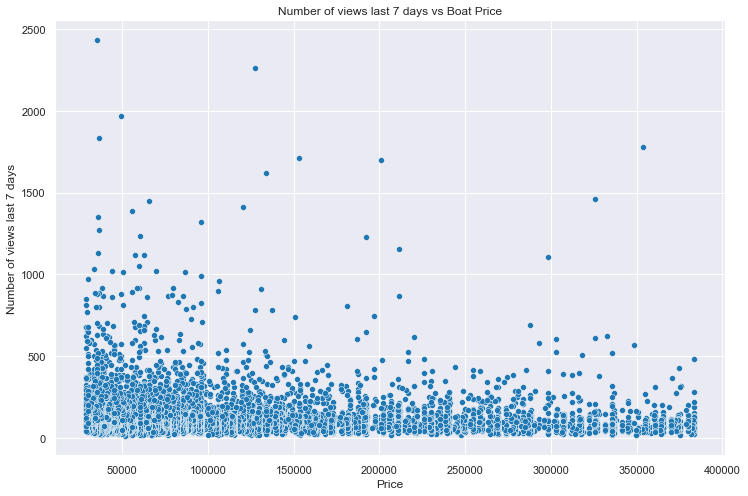

<Figure size 864x576 with 0 Axes>

In [172]:
sns.scatterplot(data=df_no_outliers, x='Price', y='Number of views last 7 days')
plt.title("Number of views last 7 days vs Boat Price")
plt.show()
plt.savefig('scatterplot.svg')

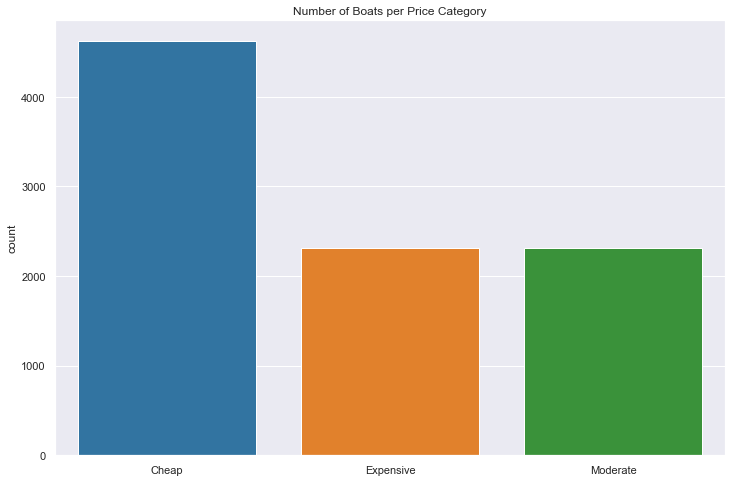

In [173]:
sns.countplot(data=new_df, x='price_category', order=['Cheap', 'Expensive', 'Moderate'])
plt.xlabel('')
plt.title("Number of Boats per Price Category")
plt.show()

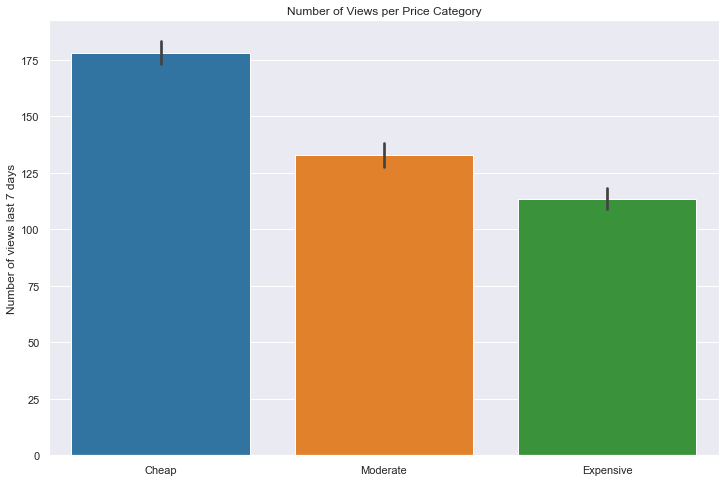

In [174]:
ax = sns.barplot(data=new_df, x='price_category', y='Number of views last 7 days')
ax.set(xlabel='',title='Number of Views per Price Category')
plt.show()

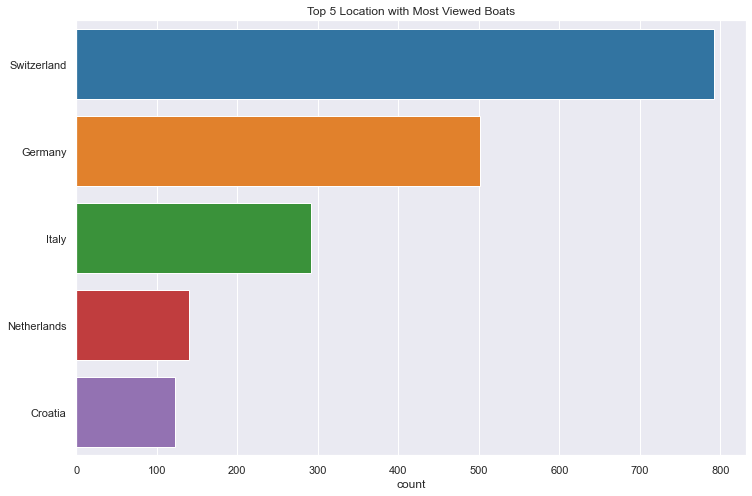

In [175]:
sns.barplot(data=most_viewed.groupby('Location')['Price'].count().sort_values(ascending=False).to_frame(name='count').reset_index().head(5), x='count', y='Location')
plt.ylabel('')
plt.title('Top 5 Location with Most Viewed Boats')
plt.show()

In [176]:
most_viewed['Location'].value_counts(normalize=True, sort=True).head(10)

Switzerland    0.340060
Germany        0.215114
Italy          0.124946
Netherlands    0.060112
Croatia        0.052812
Spain          0.042508
France         0.040790
Denmark        0.015028
Belgium        0.013310
Austria        0.013310
Name: Location, dtype: float64

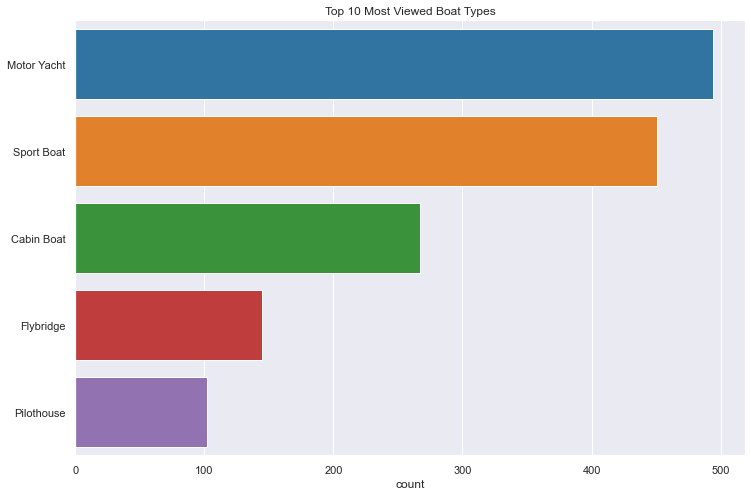

In [177]:
sns.barplot(data=most_viewed.groupby('Boat Type')['Price'].count().sort_values(ascending=False).to_frame(name='count').reset_index().head(5), x='count', y='Boat Type')
plt.ylabel('')
plt.title('Top 10 Most Viewed Boat Types')
plt.show()

In [178]:
most_viewed['Boat Type'].value_counts(normalize=True, sort=True).head(10)

Motor Yacht     0.212108
Sport Boat      0.193645
Cabin Boat      0.114641
Flybridge       0.062258
Pilothouse      0.043796
Bowrider        0.037355
Trawler         0.033061
Hardtop         0.032632
Fishing Boat    0.029626
House Boat      0.021898
Name: Boat Type, dtype: float64

In [179]:
most_viewed.sort_values('Number of views last 7 days', ascending=False).head(20)

,Price,Boat Type,Type,Year Built,Length,Width,Location,Number of views last 7 days,price_category
9580,15050.51,Motor Yacht,"Used boat,Unleaded",1992,7.70,2.46,Switzerland,3263,Cheap
8723,35353.54,Hardtop,"Used boat,Diesel",1979,11.12,3.88,Switzerland,2432,Cheap
6211,127171.72,"Bowrider,Motor Yacht,Sport Boat","Used boat,Diesel",2002,12.35,3.48,Switzerland,2261,Moderate
3700,912500.00,Hardtop,"Used boat,Diesel",2009,20.30,5.20,Neustadt,2154,Expensive
308,20101.01,Sport Boat,"Used boat,Unleaded",1993,6.14,2.34,Switzerland,2026,Cheap
894,48989.90,Cabin Boat,"Used boat,Unleaded",2014,6.65,2.30,Switzerland,1970,Cheap
9878,5049.49,"Sport Boat,Wakeboard/Wakesurf,Water ski","Used boat,Unleaded",1980,6.00,2.10,Switzerland,1917,Cheap
8684,36363.64,Sport Boat,"Used boat,Unleaded",2005,6.40,2.31,Switzerland,1834,Cheap
9843,6565.66,Sport Boat,"Used boat,Unleaded",1995,6.80,2.38,Thun,1831,Cheap
35,3838.38,Cabin Boat,"Used boat,Unleaded",1980,6.20,2.45,Switzerland,1804,Cheap


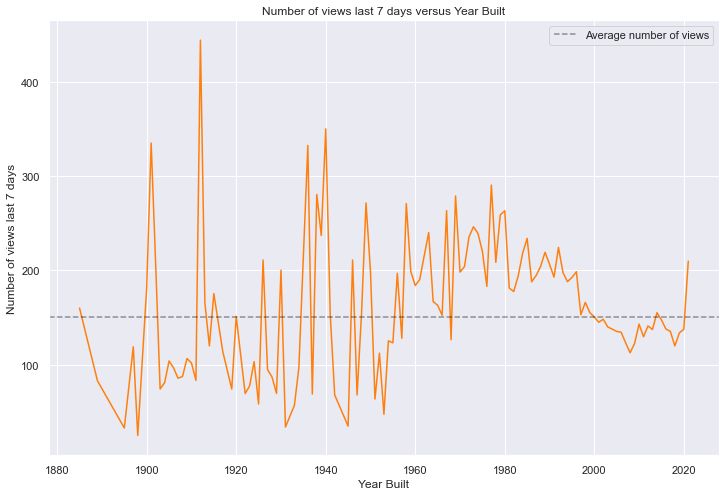

In [180]:
sns.lineplot(data=new_df, x='Year Built', y='Number of views last 7 days', ci=None, color='tab:orange')
plt.axhline(new_df['Number of views last 7 days'].mean(), linestyle='--', color='black', alpha=0.4, label='Average number of views')
plt.legend()
plt.title("Number of views last 7 days versus Year Built")
plt.show()

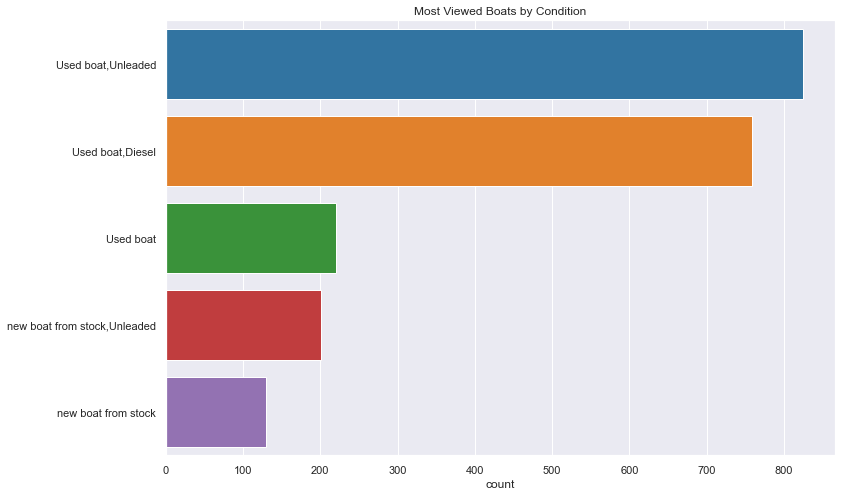

In [181]:
sns.barplot(data=most_viewed['Type'].value_counts(sort=True).to_frame(name='count').reset_index().head(5), y='index', x='count')
plt.ylabel('')
plt.title('Most Viewed Boats by Condition')
plt.show()

In [182]:
most_viewed['Type'].value_counts(sort=True, normalize=True)

Used boat,Unleaded              0.354229
Used boat,Diesel                0.325462
Used boat                       0.094461
new boat from stock,Unleaded    0.086303
new boat from stock             0.055818
new boat from stock,Diesel      0.016316
new boat on order,Unleaded      0.014599
Display Model,Unleaded          0.013310
new boat on order,Diesel        0.009446
Display Model                   0.004294
new boat on order               0.004294
Unleaded                        0.004294
Used boat,Electric              0.003864
Diesel                          0.003864
Display Model,Diesel            0.003006
Used boat,Gas                   0.002147
new boat from stock,Electric    0.002147
Display Model,Electric          0.000859
new boat from stock,Gas         0.000429
new boat from stock,Hybrid      0.000429
Used boat,Propane               0.000429
Name: Type, dtype: float64

# INSIGHTS FROM EDA

1. On average, cheap boats have a higher number of views than expensive boats. 
2. There is no linear correlation betweeen number of views and price.
3. Switzerland is the location with the most viewed boats.
4. Approximately 68% of most viewed boats are listed in Switzerland, Germany or Italy.
5. The most viewed boat type is Motor Yacht.
6. Motor Yacht, Sport Boat, and Cabin Boat make up 52% of most viewed boats. 
7. On average, boats built in the 1900s have the highest number of views within the last 7 days.
8. Approximately 77% of most viewed boats are used boats having either diesel or unleaded gasoline engine.

# RECOMMENDATIONS

1. Cheap boats listed in Switzerland should be included more in the newsletter.
2. Boats built in the 1800s typically have lower views and should not be included in the newsletter.